## Preprocessing

In [1]:
# TODO: comment
import pandas as pd
import numpy as np
#
import warnings
warnings.filterwarnings("ignore")
#

In [2]:
# TODO: comment
path_to_file = "../data/Component_Faults_Data.csv"
df = pd.read_csv(path_to_file)

In [3]:
# TODO: comment
x = df.iloc[:, :48].values
y = df["class"].values.reshape(-1, 1)

In [4]:
# TODO: comment
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)

In [5]:
# TODO: comment
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [6]:
# TODO: comment
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

## Data Exploration

count    2.925500e+04
mean     1.182436e-06
std      2.277411e-04
min     -6.055700e-03
25%     -7.369750e-05
50%      7.743100e-07
75%      7.569250e-05
max      3.330400e-03
Name: V3, dtype: float64


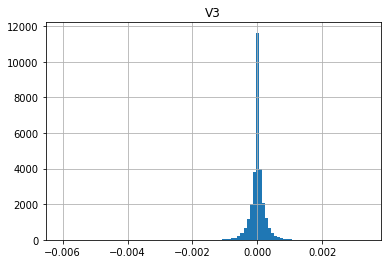

count    29255.000000
mean         0.001774
std          0.036425
min         -0.130630
25%         -0.020205
50%          0.013157
75%          0.024576
max          0.068515
Name: V7, dtype: float64


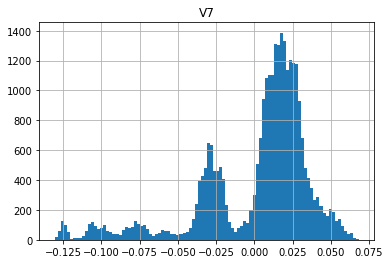

count    29255.000000
mean         7.417750
std         12.113144
min         -0.581230
25%          1.475700
50%          3.297900
75%          8.364350
max        312.520000
Name: V38, dtype: float64


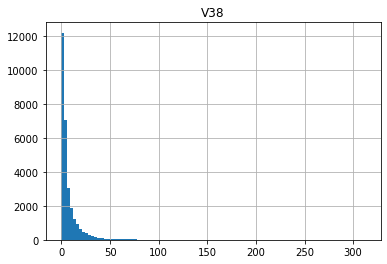

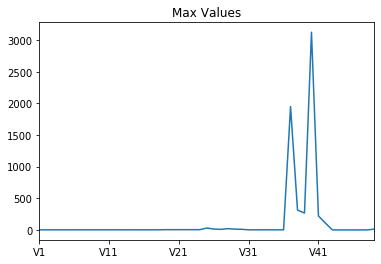

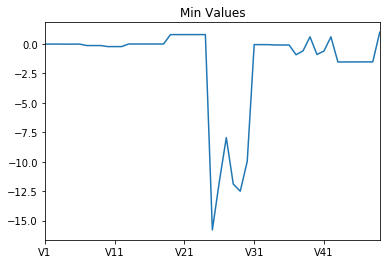

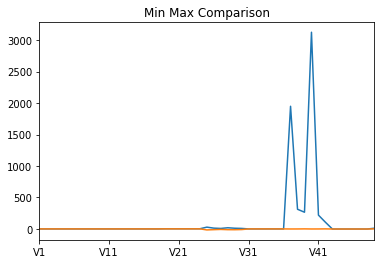

In [8]:
import matplotlib.pyplot as plt
#stats are very different among a few columns
#V3

print(df['V3'].describe())
df['V3'].hist(bins=100)
plt.title('V3')
plt.show()

#V7
print(df['V7'].describe())
df['V7'].hist(bins=100)
plt.title('V7')
plt.show()

#V38
print(df['V38'].describe())
df['V38'].hist(bins=100)
plt.title('V38')
plt.show()

#min max value visualizer
headers=list(df)

#maximum values
df.max().plot()
plt.title('Max Values')
plt.xticks()
plt.show()
#minimum values
df.min().plot()
plt.title('Min Values')
plt.show()

#combined
df.max().plot()
df.min().plot()
plt.title('Min Max Comparison')
plt.show()

## Newer Solution for testing NN-Configuration

In [9]:
# Imports for class
import sys
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt    
import itertools
        

""" 
    The following class helps in streamlining the building, training, and testing of a Neural Network (NN)
    With it, we can see the effect on the result for changing a single parameter 
    So we only have to provide the name of the parameter we have to change, and the values we want to test it with
"""
class NeuralNetworkParameterTester:

    # The config holds all the changeable parameters for building, training and testing the NN
    parameter_config = {
                'number_of_hidden_layers': [1],
                'number_of_units_per_hidden_layer': [10],
                'epochs': [100],
                'batch_size': [64],
                'activation_function': ['relu'],
                'loss_function': ['categorical_crossentropy'],
                'optimizer': ['sgd']}
    
    # Result of the test
    result = []
    
    """ 
        If you want to test your parameters, then you have to call this class
    """       
    def run(self):
        
        # Reset result
        self.result = []
        
        # Build all possible parameter combinations and  ...
        for config in self.__get_all_config_combinations():
            # ... build the NN-model for it
            model = self.__build(config)
            # ... train the NN-model 
            trained_model, history = self.__train(config, model)
            # ... test the NN-model and get the accuracy score
            accuracy = self.__test(trained_model)

            # Save the result
            self.result.append({'parameter_config': config.copy(), 
                                "result": {'model': trained_model, 
                                           'accuracy': accuracy}})
            
    """ 
        The following method builds all combinations of your parameter-config
    """          
    def __get_all_config_combinations(self):

        raw_combinations = list(itertools.product(*(self.parameter_config[parameter] for parameter in self.parameter_config)))

        config_combinations_list = []
        for combination in raw_combinations:
            c = {
                'number_of_hidden_layers': combination[0],
                'number_of_units_per_hidden_layer': combination[1],
                'epochs': combination[2],
                'batch_size': combination[3],
                'activation_function': combination[4],
                'loss_function': combination[5],
                'optimizer': combination[6]}
            
            config_combinations_list.append(c)
        
        return config_combinations_list
    
    """ 
        The following method builds the NN-Model
    """   
    def __build(self, config):

        # Sequential model (Basic NN)
        model = Sequential()        
        # Building of input layer
        model.add(Dense(config['number_of_units_per_hidden_layer'], 
                        input_dim=48, 
                        activation=config['activation_function']))
        # Building of hidden layer(s)
        for i in range(config['number_of_hidden_layers']):
            model.add(Dense(config['number_of_units_per_hidden_layer'], 
                            activation=config['activation_function'], use_bias=True))
        # Building of output layer
        model.add(Dense(11, activation="softmax"))
        # ?
        model.compile(loss=config['loss_function'], 
                      optimizer=config['optimizer'], 
                      metrics=['accuracy'])
        return model
    
    """ 
        The following method trains the NN-Model
    """   
    def __train(self, config, model):
        # xtrain and ytrain is the data from preprocessing
        history = model.fit(x_train, 
                            y_train, 
                            epochs=config['epochs'], 
                            batch_size=config['batch_size'])  
        
        return model, history
    
    """ 
        The following method tests the NN-Model
    """ 
    # TODO: look at this method more closely. So far just copy paste
    @staticmethod
    def __test(model):
        y_pred = model.predict(x_test)
        # Converting predictions to label
        pred = list()
        for i in range(len(y_pred)):
            pred.append(np.argmax(y_pred[i]))
        # Converting one hot encoded test label to label
        test = list()
        for i in range(len(y_test)):
            test.append(np.argmax(y_test[i]))

        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(pred, test)
        # TODO: calculate confusion matrix and put it in result
        return accuracy
                                    
                                    
    #--------------- Setter methods for setting parameters --------------------------------------#
    
    def set_number_of_hidden_layers(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_hidden_layers"] = val
        else:
            self.parameter_config["number_of_hidden_layers"] = [val]
        
    def set_number_of_units_per_hidden_layer(self, val):
        if isinstance(val, list):
            self.parameter_config["number_of_units_per_hidden_layer"] = val
        else:
            self.parameter_config["number_of_units_per_hidden_layer"] = [val]
        
    def set_activation_function(self, val):
        if isinstance(val, list):
            self.parameter_config["activation_function"] = val
        else:
            self.parameter_config["activation_function"] = [val]
        
    def set_epochs(self, val):
        if isinstance(val, list):
            self.parameter_config["epochs"] = val
        else:
            self.parameter_config["epochs"] = [val]
        
    def set_batch_size(self, val):
        if isinstance(val, list):
            self.parameter_config["batch_size"] = val
        else:
            self.parameter_config["batch_size"] = [val]
        
    def set_loss_function(self, val):
        if isinstance(val, list):
            self.parameter_config["loss_function"] = val
        else:
            self.parameter_config["loss_function"] = [val]
        
    def set_optimizer(self, val):
        if isinstance(val, list):
            self.parameter_config["optimizer"] = val
        else:
            self.parameter_config["optimizer"] = [val]
        
    #--------------- Resets the config to default values --------------------------------------#
    
    def reset_config(self):
        parameter_config = {
            'number_of_hidden_layers': [1],
            'number_of_units_per_hidden_layer': [10],
            'epochs': [100],
            'batch_size': [64],
            'activation_function': ['relu'],
            'loss_function': ['categorical_crossentropy'],
            'optimizer': ['sgd']}
        
        self.parameter_config = parameter_config
        
        
    #--------------- Helper methods -----------------------------------------------------------#
        
    def __get_number_of_params_with_multiple_vals(self):
        number_of_params_with_multiple_vals = 0 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                number_of_params_with_multiple_vals += 1
        return number_of_params_with_multiple_vals
    
    def __get_param_names_with_multiple_vals(self):
        param_names_with_multiple_vals = [] 
        for key in self.parameter_config.keys():
            if len(self.parameter_config[key]) > 1:
                param_names_with_multiple_vals.append(key)
        return param_names_with_multiple_vals
        
        
    #--------------- Plotter methods -----------------------------------------------------------#
    
    def plot_result(self):
        
        number_of_params_with_multiple_vals = self.__get_number_of_params_with_multiple_vals()
        param_names_with_multiple_vals = self.__get_param_names_with_multiple_vals()
        
        if number_of_params_with_multiple_vals == 1:
            self.__plot_2d(param_names_with_multiple_vals[0])
        elif number_of_params_with_multiple_vals == 2:
            self.__plot_3d(param_names_with_multiple_vals)
        else:
            print("Plotting for this result is not supported")
            # TODO PCA?
        
    def __plot_2d(self, param_name_with_multiple_vals):

        param_vals = [element['parameter_config'][param_name_with_multiple_vals] for element in self.result]
        accuracy_result = [element['result']['accuracy'] for element in self.result]

        plt.scatter(param_vals, accuracy_result)
        plt.plot(param_vals, accuracy_result, linestyle='--')
        plt.title("Accuracy per " + "'" + param_name_with_multiple_vals + "'")
        plt.ylabel("Accuracy")
        plt.xlabel(param_name_with_multiple_vals)
        plt.show()
        
        print("\n\n")
        
        df = pd.DataFrame(list(zip(param_vals, accuracy_result)), 
               columns =[param_name_with_multiple_vals, 'Accuracy']) 
        print(df)
        
        
    # TODO sis  
    def __plot_3d(self, param_name_with_multiple_vals):

        pass

Using TensorFlow backend.


## Test NN with parameters

In [10]:
nnpt = NeuralNetworkParameterTester()

In [11]:
nnpt.set_number_of_hidden_layers(2)
nnpt.set_number_of_units_per_hidden_layer([2])

In [12]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [2],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [13]:
nnpt.parameter_config

{'number_of_hidden_layers': [2],
 'number_of_units_per_hidden_layer': [2],
 'epochs': [100],
 'batch_size': [64],
 'activation_function': ['relu'],
 'loss_function': ['categorical_crossentropy'],
 'optimizer': ['sgd']}

In [14]:
nnpt.run()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





26329/26329 [==============================] - 3s 100us/step - loss: 2.3979 - acc: 0.0894
Epoch 2/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.3979 - acc: 0.0899
Epoch 3/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0912
Epoch 4/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.3979 - acc: 0.0924
Epoch 5/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.3979 - acc: 0.0906
Epoch 6/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.3979 - acc: 0.0927
Epoch 7/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.3979 - acc: 0.0909
Epoch 8/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.3979 - acc: 0.0927
Epoch 9/100
26329/26329 [==============================] - 1s 24us/step - loss: 2.39

26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0927
Epoch 54/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0915
Epoch 55/100
26329/26329 [==============================] - 1s 26us/step - loss: 2.3979 - acc: 0.0927
Epoch 56/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0921
Epoch 57/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0923
Epoch 58/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0917
Epoch 59/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0920
Epoch 60/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0927
Epoch 61/100
26329/26329 [==============================] - 1s 25us/step - loss: 2.3979 - acc: 0.0927
Epoch 62/100
26329/26329 [==============================] - 1s 26us/step - loss: 2.3979 - acc: 

In [20]:
#model plot 
from keras.utils import plot_model

model = nnpt.result[0]['result']['model']

plot_model(model, to_file='model.png', show_shapes=True)

![title](model.png)

In [16]:
nnpt.result

[{'parameter_config': {'number_of_hidden_layers': 2,
   'number_of_units_per_hidden_layer': 2,
   'epochs': 100,
   'batch_size': 64,
   'activation_function': 'relu',
   'loss_function': 'categorical_crossentropy',
   'optimizer': 'sgd'},
  'result': {'model': <keras.engine.sequential.Sequential at 0x236b4a9b148>,
   'accuracy': 0.09056732740943267}}]

In [17]:
nnpt.plot_result()

Plotting for this result is not supported


In [18]:
nnpt.plot_result()

Plotting for this result is not supported


In [21]:
# TODO: Plot Matrix